# Demonstration of discrete HMMs with Categorical, Independent Bernoulli, or Mixture of Bernoullis emissions

In [2]:
# Import stuff
import numpy as np
import DiscreteHMM
import DiscreteMixtureHMM

%matplotlib inline
import pylab as plt

In [23]:
# Make some categorical data. 2 sequences of data with 3 emissions (0, 1, or 2). 2 states in the data, with the 
# states switching at 100 and 200 on both sequences
# Emission probabilities on state 0 - [1/3, 1/3, 1/3]
# Emission probabilities on state 1 - [1/6, 2/3, 1/6]
data = np.zeros((2,300))
data[0, :100] = np.random.choice(np.arange(3), size = 100, p = [1/3, 1/3, 1/3])
data[0, 100:200] = np.random.choice(np.arange(3), size = 100, p =  [1/6, 2/3, 1/6])
data[0, 200:] = np.random.choice(np.arange(3), size = 100, p = [1/3, 1/3, 1/3])
data[1, :100] = np.random.choice(np.arange(3), size = 100, p =  [1/3, 1/3, 1/3])
data[1, 100:200] = np.random.choice(np.arange(3), size = 100, p =  [1/6, 2/3, 1/6])
data[1, 200:] = np.random.choice(np.arange(3), size = 100, p =  [1/3, 1/3, 1/3])

In [24]:
# Make a CategoricalHMM model
model = DiscreteHMM.CategoricalHMM(num_states = 2, num_emissions = 3, max_iter = 1000, threshold = 1e-6)

In [25]:
# Fit with very weak priors. Just 1 pseudocount, probably ok for start probabilities, but likely more pseudocounts
# needed for the transition and emission probabilities
model.fit(data=data, p_transitions=np.random.random(size=(2, 2)), p_emissions=np.random.random(size=(2, 3)), 
          p_start=np.random.random(2), transition_pseudocounts=np.ones((2, 2)), emission_pseudocounts=np.ones((2, 3)), 
          start_pseudocounts=np.ones(2), verbose = False)

In [26]:
model.converged

True

In [27]:
model.p_emissions

array([[ 0.14809095,  0.71180495,  0.14010409],
       [ 0.33821666,  0.30764709,  0.35413625]])

In [28]:
# Get the posterior probabilities of the states from the E step
alpha, beta, scaling, expected_latent_state, expected_latent_state_pair = model.E_step()

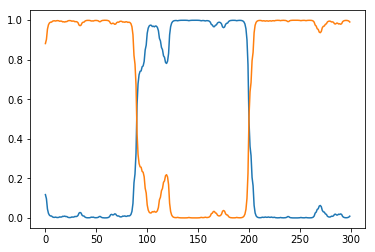

In [29]:
plt.plot(expected_latent_state[:, 0, :].T)

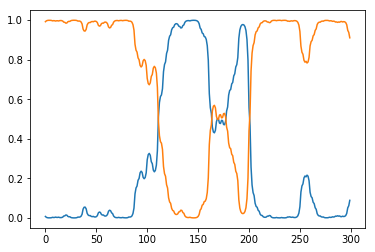

In [30]:
plt.plot(expected_latent_state[:, 1, :].T)

In [31]:
# Make some Bernoulli data. 2 sequences of data with 3 independent Bernoulli emissions. 2 states in the data, with the 
# states switching at 100 and 200 on both sequences
# Probability of emitting 1 on state 0 - [1/3, 1/3, 1/3]
# Probability of emitting 1 on state 1 - [1/6, 2/3, 1/6]
data = np.zeros((3, 2, 300)) 
p = np.array([[1/3, 1/3, 1/3], [1/6, 2/3, 1/6]])
# state 0 runs from 0-100
for i in range(2):                                           
    for j in range(100):                                              
        for k in range(3):                                            
            data[k, i, j] = np.random.binomial(1, p[0, k])
# state 1 runs from 100-200
for i in range(2):                                           
    for j in range(100):                                              
        for k in range(3):                                            
            data[k, i, j+100] = np.random.binomial(1, p[1, k])
# state 0 runs from 200-300
for i in range(2):                                           
    for j in range(100):                                              
        for k in range(3):                                            
            data[k, i, j+200] = np.random.binomial(1, p[0, k])

In [32]:
# Make an IndependentBernoulliHMM model
model = DiscreteHMM.IndependentBernoulliHMM(num_states = 2, num_emissions = 3, max_iter = 1000, threshold = 1e-6)

In [33]:
# Fit with very weak priors. Just 1 pseudocount, probably ok for start probabilities, but likely more pseudocounts
# needed for the transition and emission probabilities
model.fit(data=data, p_transitions=np.random.random(size=(2, 2)), p_emissions=np.random.random(size=(2, 3)), 
          p_start=np.random.random(2), transition_pseudocounts=np.ones((2, 2)), emission_pseudocounts=np.ones((2, 3, 2)), 
          start_pseudocounts=np.ones(2), verbose = False)

In [34]:
model.converged

True

In [35]:
model.p_emissions

array([[ 0.11316141,  0.66208226,  0.14716344],
       [ 0.3573049 ,  0.29853509,  0.36770389]])

In [36]:
# Get the posterior probabilities of the states from the E step
alpha, beta, scaling, expected_latent_state, expected_latent_state_pair = model.E_step()

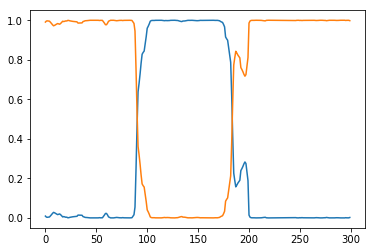

In [37]:
plt.plot(expected_latent_state[:, 0, :].T)

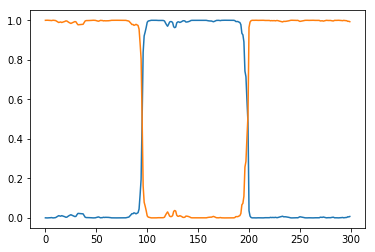

In [38]:
plt.plot(expected_latent_state[:, 1, :].T)

# Mixture of Bernoulli emissions

In [4]:
# Make some Bernoulli data. 2 sequences of data with 4 Bernoulli emissions. 2 states in the data - each state
# consists of 3 mixture components which together produce the emissions
# Total length of each sequence of 600 with the states switching at 200 and 400 on both sequences
# Emission components of state 1 (numbers are the probability of emitting 1 at each emission):
# [[1/3, 1/3, 1/3],
#  [1/2, 9/10, 1/100],
#  [10/11, 1/1000, 1/8]]
# Emission components of state 2 (numbers are the probability of emitting 1 at each emission):
# [[1/2, 1/2, 1/2],
#  [1/100, 10/11, 1/1000],
#  [1/8, 1/3, 9/10]]
# Component mixing probabilities of state 1: [1/3, 1/3, 1/3]
# Component mixing probabilities of state 2: [1/8, 1/4, 5/8]

data = np.zeros((3, 2, 600)) 
p_emissions = np.array([[[1/3, 1/3, 1/3], [1/2, 9/10, 1/100], [10/11, 1/1000, 1/8]],
                        [[1/2, 1/2, 1/2], [1/100, 10/11, 1/1000], [1/8, 1/3, 9/10]]])
p_mixing = np.array([[1/3, 1/3, 1/3],
                     [1/8, 1/4, 5/8]])
# state 0 runs from 0-200
for i in range(2):                                           
    for j in range(200):
        # Choose the mixture component
        component = np.random.choice([0, 1, 2], p=p_mixing[0, :])
        for k in range(3):                                            
            data[k, i, j] = np.random.binomial(1, p_emissions[0, component, k])
# state 1 runs from 200-400
for i in range(2):                                           
    for j in range(200):
        # Choose the mixture component
        component = np.random.choice([0, 1, 2], p=p_mixing[1, :])
        for k in range(3):                                            
            data[k, i, j+200] = np.random.binomial(1, p_emissions[1, component, k])
# state 0 runs from 400-600
for i in range(2):                                           
    for j in range(200):
        # Choose the mixture component
        component = np.random.choice([0, 1, 2], p=p_mixing[0, :])
        for k in range(3):                                            
            data[k, i, j+400] = np.random.binomial(1, p_emissions[0, component, k])

In [97]:
# First try an IndependentBernoulliHMM model
model = DiscreteHMM.IndependentBernoulliHMM(num_states = 2, num_emissions = 3, max_iter = 1000, threshold = 1e-6)

In [104]:
# Fit with very weak priors. Just 1 pseudocount, probably ok for start probabilities, but likely more pseudocounts
# needed for the transition and emission probabilities
model.fit(data=data, p_transitions=np.random.random(size=(2, 2)), p_emissions=np.random.random(size=(2, 3)), 
          p_start=np.random.random(2), transition_pseudocounts=np.ones((2, 2)), emission_pseudocounts=np.ones((2, 3, 2)), 
          start_pseudocounts=np.ones(2), verbose = False)

In [105]:
model.converged

True

In [106]:
model.p_emissions

array([[0.32813044, 0.9615329 , 0.2296879 ],
       [0.55446376, 0.05325773, 0.36233457]])

In [107]:
# Get the posterior probabilities of the states from the E step
alpha, beta, scaling, expected_latent_state, expected_latent_state_pair = model.E_step()

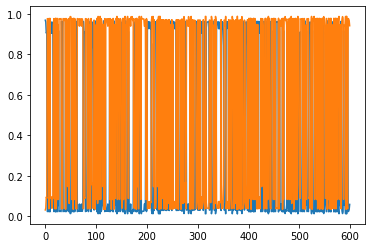

In [108]:
plt.plot(expected_latent_state[:, 0, :].T)

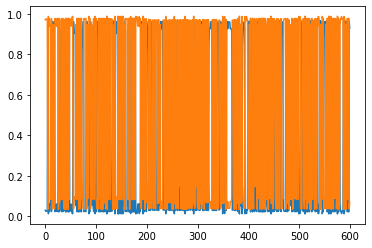

In [109]:
plt.plot(expected_latent_state[:, 1, :].T)

This sort of noisy state flickering happens quite a lot with the Independent Bernoulli HMM when faced with a lot of emission variability within the same state(s) (as happens here). This is not to say that the Independent Bernoulli HMM never picks on the right state sequence - given enough random restarts, it is able to find the right state sequence in this case as the emission structure of the states in this made-up example is very different. That might not be true in other cases

In [87]:
# Now try a Bernoulli Mixture model
model = DiscreteMixtureHMM.BernoulliMixtureHMM(num_states = 2,
                                               num_mixture_components=3,
                                               num_emissions = 3, 
                                               max_iter = 1000, 
                                               threshold = 1e-6)

In [88]:
# Fit with very weak priors. Just 1 pseudocount, probably ok for start probabilities, but likely more pseudocounts
# needed for the transition and emission probabilities
model.fit(data=data, p_transitions=np.random.random(size=(2, 2)), p_mixing=np.random.random(size=(2, 3)), 
          p_emissions=np.random.random(size=(2, 3, 3)), p_start=np.random.random(2), 
          transition_pseudocounts=np.ones((2, 2)), component_pseudocounts=np.ones((2, 3)), 
          emission_pseudocounts=np.ones((2, 3, 3, 2)), start_pseudocounts=np.ones(2), verbose = False)

In [89]:
model.converged

True

In [90]:
model.p_mixing

array([[0.21101163, 0.46843786, 0.32055051],
       [0.44419639, 0.12124812, 0.43455549]])

In [91]:
p_mixing

array([[0.33333333, 0.33333333, 0.33333333],
       [0.125     , 0.25      , 0.625     ]])

In [92]:
# Get the posterior probabilities of the states from the E step
alpha, beta, scaling, expected_latent_state_and_component, expected_latent_state_pair = model.E_step()

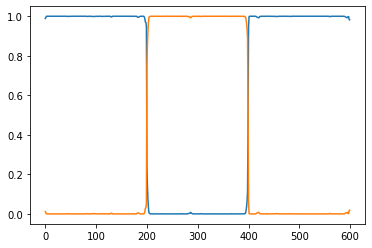

In [93]:
plt.plot(np.sum(expected_latent_state_and_component[:, :, 0, :], axis=1).T)

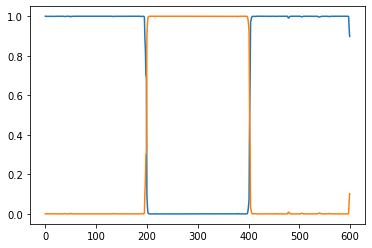

In [94]:
plt.plot(np.sum(expected_latent_state_and_component[:, :, 1, :], axis=1).T)

The Bernoulli Mixture HMM has an easier time finding the right sequence of states in this example.

In [95]:
model.p_emissions

array([[[0.51463949, 0.15678016, 0.4325163 ],
        [0.85614791, 0.26252856, 0.07779656],
        [0.33600497, 0.79216636, 0.06768205]],

       [[0.16790086, 0.24822485, 0.91621825],
        [0.30366539, 0.53139998, 0.7603961 ],
        [0.04915605, 0.87408554, 0.25105853]]])

In [96]:
p_emissions

array([[[0.33333333, 0.33333333, 0.33333333],
        [0.5       , 0.9       , 0.01      ],
        [0.90909091, 0.001     , 0.125     ]],

       [[0.5       , 0.5       , 0.5       ],
        [0.01      , 0.90909091, 0.001     ],
        [0.125     , 0.33333333, 0.9       ]]])